<a href="https://colab.research.google.com/github/gummallaprasanth/Zomato_EDA/blob/main/zomato_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# we can use raw data to access the data from github
# df=pd.read_csv('https://raw.githubusercontent.com/TheiScale/YouTube-Video-Notes/main/Zomato_Python_Project/Zomato%20data%20.csv')

In [ ]:
# another method download data from github and import it and store in a variable
df=pd.read_csv('Zomato.csv',encoding='unicode_escape')

In [ ]:
# print first 5 rows of data

df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [ ]:
# printing the last 5 rows of data

df.tail()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining
147,Vijayalakshmi,Yes,No,3.9/5,47,200,Dining


In [ ]:
# printing the shape of the dataset

df.shape

(148, 7)

In [ ]:
# printing the columns of the dataset

df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [ ]:
# removing the /5 from the rate column for better understanding and acessing

df['rate']=df['rate'].str.replace('/5','')

In [ ]:
# checking after the removing the /5 from the rate column

df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [ ]:
# printing the overall data and datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [ ]:
# converting thhe rate column datatype into float datatype
df['rate']=df['rate'].astype(float)

In [ ]:
# printing the overall statistics of the dataset

df.describe()

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


In [ ]:
# printing the correlation of the all data variables

df.corr(numeric_only=True)

,rate,votes,approx_cost(for two people)
rate,1.000000,0.489844,0.275216
votes,0.489844,1.000000,0.324372
approx_cost(for two people),0.275216,0.324372,1.000000


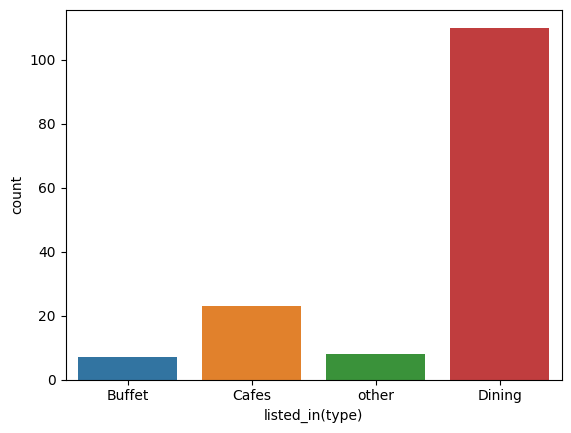

In [ ]:
# use seaborn for ploting some visualizing graphs for better understanding types of restaurents
# what type of restaurant do the majority of customers order from?

sns.countplot(x='listed_in(type)', data=df,hue="listed_in(type)")
plt.show()

In [ ]:
#printing the columns of data

df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [ ]:
# how many votes has each type of restaurant recived from customers

vote=df.groupby('listed_in(type)')['votes'].sum().sort_values(ascending=False).reset_index()
vote


,listed_in(type),votes
0,Dining,20363
1,other,9367
2,Cafes,6434
3,Buffet,3028


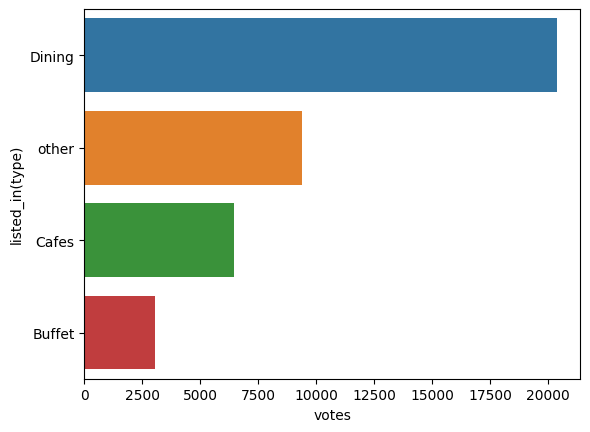

In [ ]:
# use some graphs fpr the votes of each restaurant

sns.barplot(y='listed_in(type)',x='votes',data=vote,hue="listed_in(type)")
plt.show()

<Axes: xlabel='listed_in(type)'>

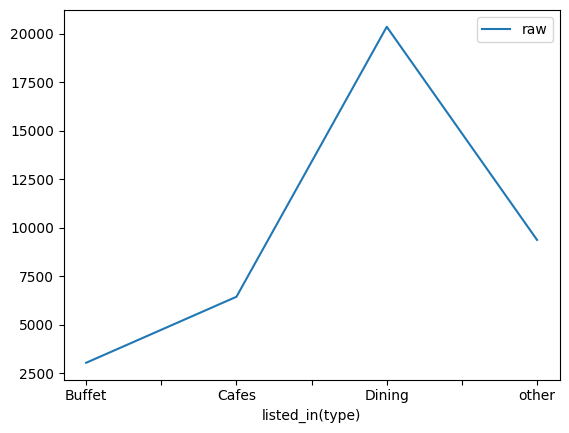

In [ ]:
# plot line graph for the votes of each restaurant

dft=pd.DataFrame({"raw":df.groupby('listed_in(type)')['votes'].sum()})
dft.plot()

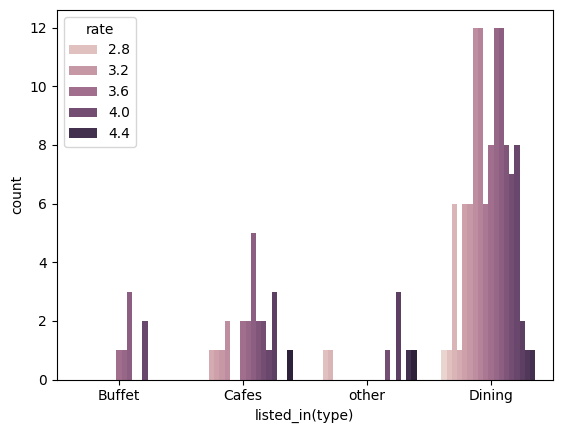

In [ ]:
# most rated restaurant in the data

sns.countplot(x='listed_in(type)',data=df,hue="rate")
plt.show()

In [ ]:
# another method grouping by restaurant and sum of ratings
rates=df.groupby("listed_in(type)")['rate'].sum().sort_values(ascending=False).reset_index()
rates

,listed_in(type),rate
0,Dining,392.9
1,Cafes,86.6
2,other,31.3
3,Buffet,26.9


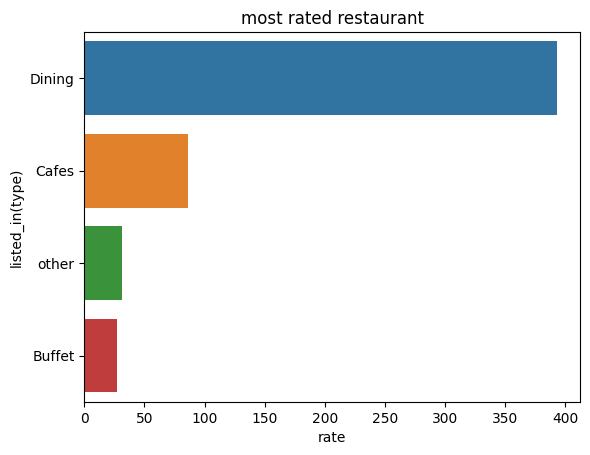

In [ ]:
# plotingthe graph use barplot to shoew the which restaurant has the higthset rating sum

sns.barplot(y="listed_in(type)",x='rate',data=rates,hue="listed_in(type)")
# plt.show()
plt.xlabel('rate')
plt.ylabel('listed_in(type)')
plt.title('most rated restaurant')
plt.show()

<Axes: >

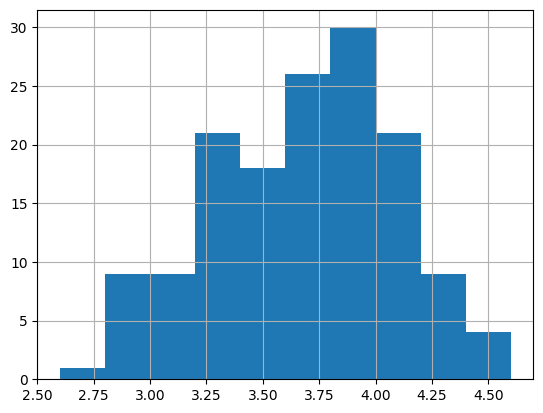

In [ ]:
# ploting the histogram for rate column for finding the most rating  that  given by the customers

df['rate'].hist()

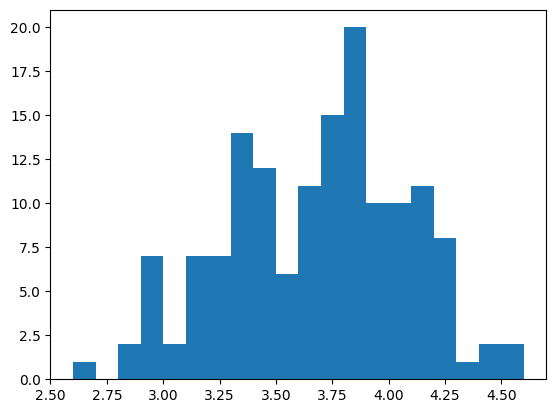

In [ ]:
# ploting the histogram for rate column for finding the most rating  that  given by the customers
# bins are used to understand when increasing the bins will help to understand the graphs

plt.hist(df['rate'],bins=20)
plt.show()

In [ ]:
# average order spending by couples

df['approx_cost(for two people)'].mean()

418.2432432432432

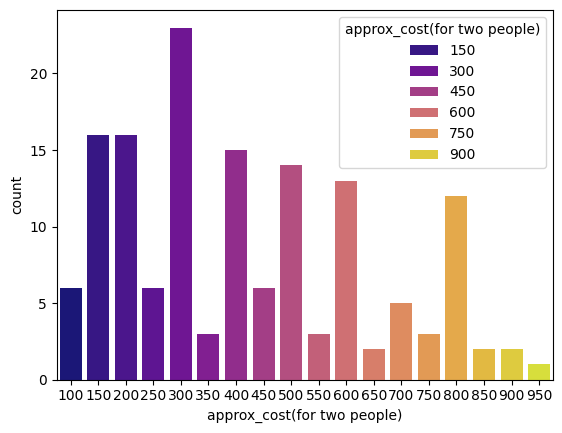

In [ ]:
# average order spending by couples by visualization


sns.countplot(x="approx_cost(for two people)",data=df,hue="approx_cost(for two people)",palette="plasma")
plt.show()

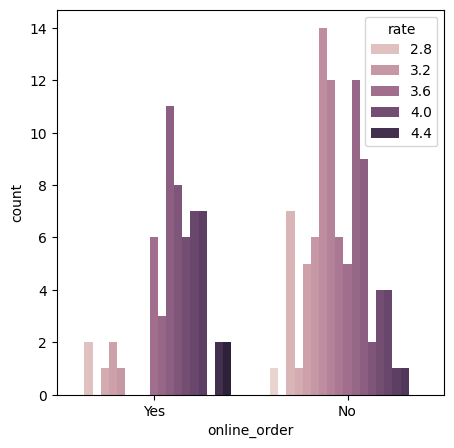

In [ ]:
# finding maximum rating by the customers is by offline or online



plt.figure(figsize=(5,5))
sns.countplot(x="online_order",data=df,hue='rate')
plt.show()

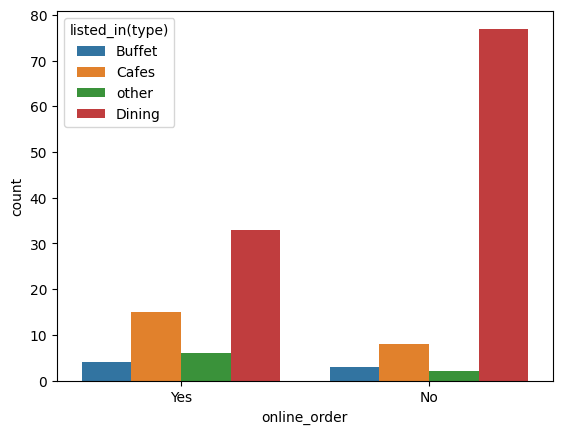

In [ ]:
# which restaurant has recived more offline orders from the customers by good offers

sns.countplot(x="online_order",data=df,hue='listed_in(type)')
plt.show()

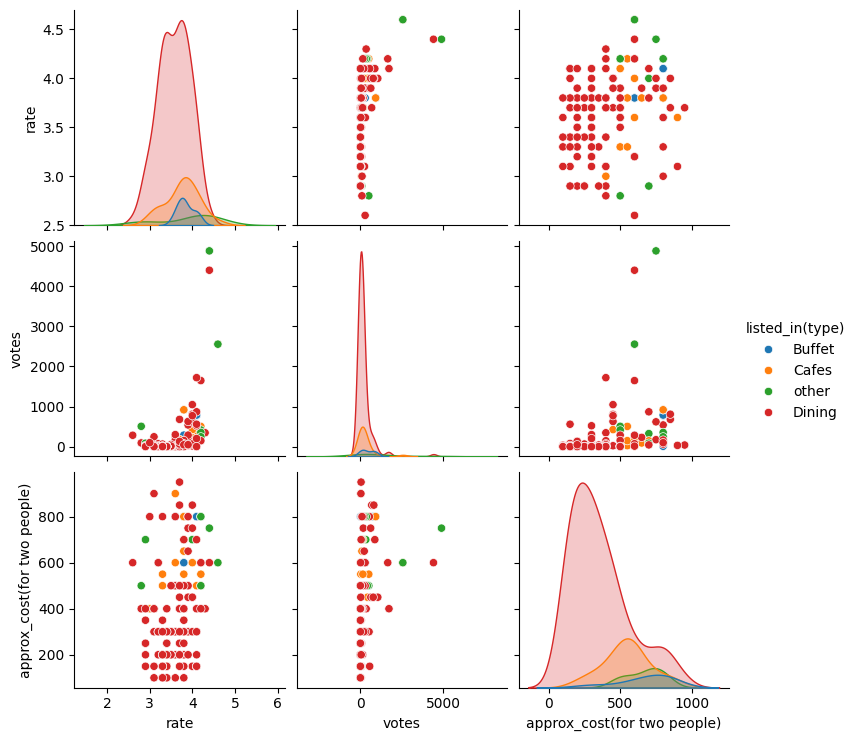

In [ ]:
# ploting pairplots
sns.pairplot(df,hue="listed_in(type)")
plt.show()

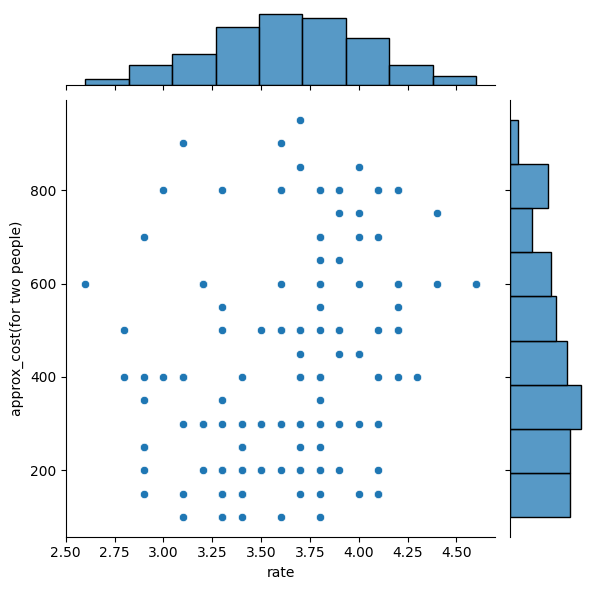

In [ ]:
# using jointplot b/w two variables
sns.jointplot(x='rate',y='approx_cost(for two people)',data=df)
plt.show()

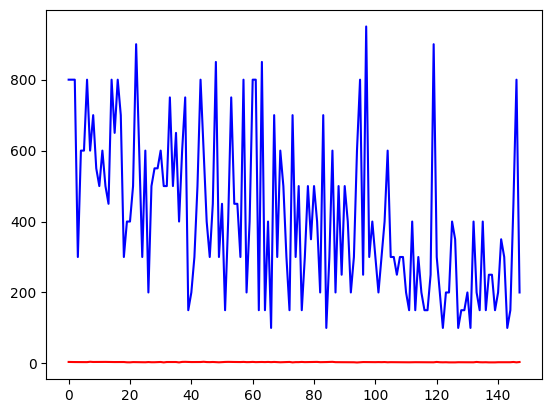

In [ ]:
# using line plot for the 'approx_cost(for two people)' column


df['approx_cost(for two people)'].plot(kind="line",color="blue")
plt.show()

<Axes: >

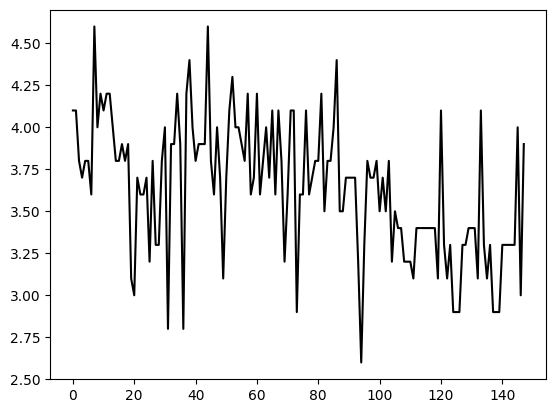

In [ ]:
# using line plot for the rate column

df['rate'].plot(kind="line",color="black")


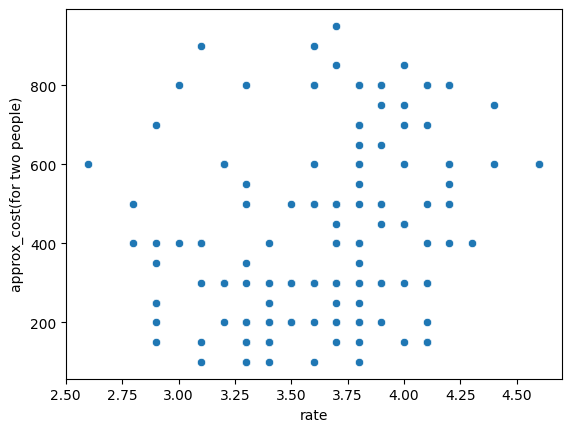

In [ ]:
#  using the scatterplot b/w two variables
sns.scatterplot(x='rate',y='approx_cost(for two people)',data=df)
plt.show()

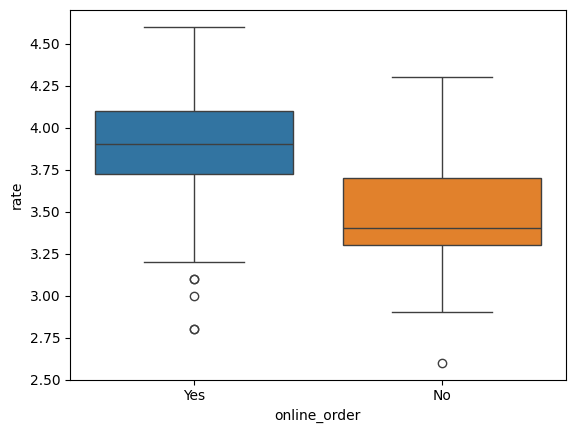

In [ ]:
# finding  the outliers in the rate column and online_order

sns.boxplot(y="rate",x='online_order',data=df,hue='online_order')
plt.show()

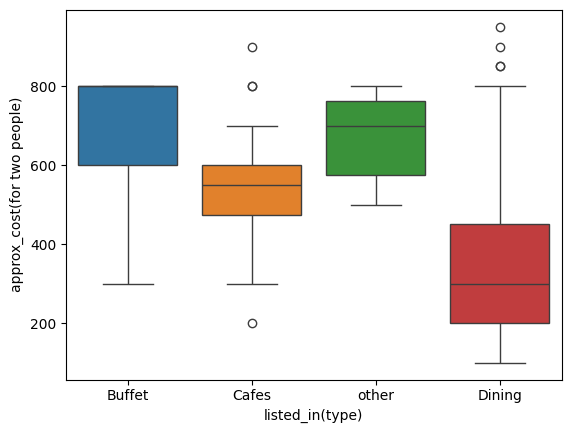

In [ ]:
# use some more boxplot for the restaurants and purchase amount

sns.boxplot(x="listed_in(type)",data=df,y='approx_cost(for two people)',hue='listed_in(type)')
plt.show()

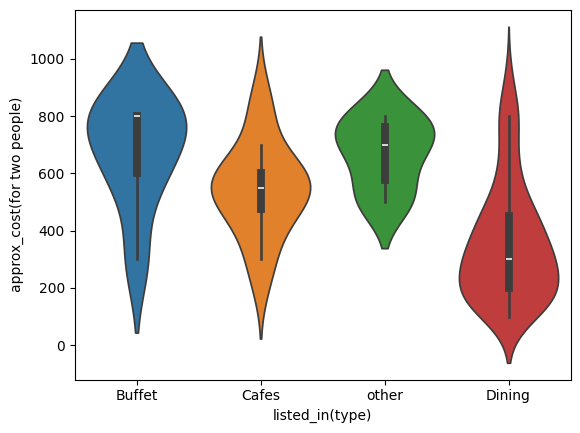

In [ ]:
# using some violinplots for good understadning the data on listed_in(type) and approx_cost(for two people)

sns.violinplot(x="listed_in(type)",data=df,y='approx_cost(for two people)',hue='listed_in(type)')
plt.show()